<a href="https://colab.research.google.com/github/Kunslog/ML_summer_Sep_25/blob/main/template_conformal_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #2 Conformal inference

**Oxford University Economics Summer School 2025, Foundations of Machine Learning**

*Johanna Barop, 2025*

These are my solutions to the second problem set for the *Foundations of Machine Learning* course at the **Oxford University Economics Summer School 2025**.


In this problem, you are asked to implement and evaluate some **conformal inference** procedures in Python. This problem builds on the first coding exercise, using Scikit-learn.

You may want to consult [Angelopoulos, A. N. and Bates, S. (2021)](https://arxiv.org/pdf/2107.07511), "A gentle introduction to conformal prediction and distribution-free uncertainty quantification".

# Conformal inference
Conformal inference is a method of uncertainty prediction. Normally we predict outcomes. Now, we will predict a _set_ that is guaranteed to contain the correct outcome in at least $(1-\alpha)$% of cases.







## How does conformal inference work intuitively?

The **goal** of conformal inference is uncertainty quantification through generating _prediction sets_.

![prediction-set-example.jpg](https://drive.google.com/uc?export=view&id=178JhIp_t4JkeToHP4x-q7frFGd4re_DN)

Figure taken from: Angelopoulos, A. N. and Bates, S. (2021). A gentle introduction to conformal prediction and distribution-free uncertainty quantification. arXiv preprint arXiv:2107.07511.

All other figures are taken from the same paper.

**Conformal inference recipe**

1. Train your model.
2. For each point $(x_i, y_i)$ in
the calibration set, compute the conformity score $s(x_i, y_i)$.
3. For a desired confidence
level $(1-\alpha)$ (e.g., $\alpha$ = 0.1 for 90% confidence), find the $\frac{(1 − \alpha)(n + 1)}{n}$-th quantile of
the calibration scores, where $n$ is the size of the calibration set.
4. For each test point $x$, construct the prediction set $C(x) = \{y : s(x, y) ≥ \text{quantile}\}$.

![illustration-conformal-inference.jpg](https://drive.google.com/uc?export=view&id=1tQJFM3JmzES1uYZrmlj-3m6btuXTX0_6)

## How will we implement conformal inference?

Conformal inference works for continuous and discrete data, and we will study **examples** of
- continuous outcome regression
- quantile regression
- discrete classification.

For each of these examples, we'll follow the following **steps**:
1. Load the data sets and split them into training, calibration, and test set. Train the predictors.
2. Compute _scores_ and _confidence sets_.
3. Summarise our results. We'll compute coverage rates, interval widths (regression) or prediction set sizes (classification), and visualise the prediction sets for selected examples.
4. Discuss strengths and limitations of the approach and compare results across different methods and data sets.

We'll work on steps 1 and 2 today and then finish the problem set up tomorrow.

# Setup

Load libraries and data sets - it's good practice to do this at the top of your script.

In [31]:
# Import all necessary libraries here.

# Import the wine and california_housing data sets from sklearn.datasets.

# Define functions to calculate scores and confidence sets

We'll define functions at the top because that's best practice. Fill in these functions as you work on the examples!

First, define the helper function `alphatilde(alpha, n)` for rounding the size cutoff appropriately. It computes
$$
\tilde\alpha = 1-\frac{\lceil(n+1)(1-\alpha)\rceil}{n}
$$

In [33]:
# Define alphatilde().


Next define functions to compute the score thresholds and prediction sets for continuous regression, quantile regression, and discrete classification.

### Continuous outcomes, simple score

Define the conformity score as:
$$
s(x, y) = |y − \hat f(x)|
$$
where $\hat f(x)$ is the predicted value from the ridge regression model.

For evaluation, construct prediction intervals $[\hat f(x) − q, \hat f(x) + q]$ where $q$ is the appropriate quantile of calibration residuals.

### Quantile regression

Define the conformity score as:
$$
s(x, y) = \max(t_{\alpha/2}(x)− y, y − t_{1-\alpha/2}(x))
$$

where $t_{\alpha/2}(x)$ and $t_{1-\alpha/2}(x)$ are the predicted quantiles.

The conformity score measures how far the true value $y$ falls outside the predicted quantile interval, with negative scores indicating the point lies within the predicted interval.

Intuitively, $\hat q$ grows or shrinks the distance between the quantiles to achieve coverage:

![quantile-regression-illustration.jpg](https://drive.google.com/uc?export=view&id=1yl2-RCoPlPBfmaGYDc6WnRDlhtMZSmsv)

### Discrete classification

Define the conformity score as:

$$
s(x,y) = \sum_{y \prime} \mathbb{1} ( j(y|x) \ge  j(y^\prime|x ) ) \cdot \hat f(y|x)
$$

where $\mathbb{1}(\cdot)$ is the indicator function. $\hat f(y|x)$ represents the predicted probability of class $y$ given features $x$. $j(y, x)$ is the rank of $\hat f(y|x)$  across all possible labels $y$.

![prediction-sets-classification.jpg](https://drive.google.com/uc?export=view&id=1I0fMj-uZEkL5l7cT6U7WrgYn942o0_T0)

# Empirical examples

## Continuous regression

Load the `california_housing` data and split it into features X and labels Y.



For a documentation of the data, see: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

Split the data into three subsets:
- a **training set** (60%) for initial model fitting,
- a **calibaration set** (20%) used for conformal inference calibration,
- and a **validation set** (20%) for final evaluation.

In [34]:
# Load the data and separate the data set into features X and outcomes y.
from sklearn.datasets import load_wine, fetch_california_housing
from sklearn.preprocessing import StandardScaler # For normalizing regressors

data1 = fetch_california_housing()
X = data1["data"]
X = StandardScaler().fit_transform(X)
y = data1["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_cal, X_val, y_cal, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
# Split the data into training, calibration, and validation.
# Hint: Do this in two steps using train_test_split().

Implement a _ridge regression_ with penalty parameter selected via cross-validation. Use cross-validation on the training set to find the optimal penalty parameter. (See the "Supervised Learning" PS for guidance.)

In [ ]:
# Define the parameter range.

# Run a grid search with cross-validation.

# Select the best model.

Compute the predictions on calibration and validation data sets.

In [ ]:
# Compute the predictions on calibration and validation data sets.
# Make sure to store them for future reference.

Compute the threshold as the quantile of the calibration scores. Then obtain the prediction sets for the validation data.

In [ ]:
# Compute the thresholds.
# Then use the thresholds to obtain the prediction sets for the validation data.

In [ ]:
# Print the shape and the first few entries of the prediction sets to check your work.

Calculate the average interval width and compute empirical coverage on the validation data.

![coverage-illustration.jpg](https://drive.google.com/uc?export=view&id=1ciYTYrnb7F3xxqyVGTKsmL5UCgqUlMPl)

In [4]:
# Average interval width

# Coverage


**What do set sizes tell us?**

- **Set size:**
- **Spread of set size** (i.e., some sets are small, others are large):

Plot prediction intervals for a subset of validation points and compare them to the true values.

In [5]:
# Create your plot here to visualise your work. Hint: Use matplotlib.pyplot.scatter() and matplotlib.pyplot.plot()

Plot the distribution of interval width over the validation set. What do you notice?

In [6]:
# Create your plot here. Hint: Use matplotlib.pyplot.hist()

## Quantile regression

Continue using the `california_housing` data.

Fit quantile regression models for quantiles $\tau_{\alpha/2}$ and $\tau_{1-\alpha/2}$ (e.g., 0.05 and 0.95 for $\alpha$ = 0.1). For simplicity, use fixed L1 regularisation and no tuning.
Note that you can use scikit-learn’s `QuantileRegressor`.

In [7]:
# Fit quantile regression models for lower and upper quantiles.

Compute the predictions on calibration and validation data sets.

In [8]:
# Compute the predictions on calibration and validation data sets.
# Make sure to store them for future reference.

Compute the threshold as the quantile of the calibration scores. Then obtain the prediction sets for the validation data.

In [9]:
# Compute the thresholds.
# Then use the thresholds to obtain the prediction sets for the validation data.

In [10]:
# Print the shape and the first few entries of the prediction sets to check your work.

Compare coverage and interval widths with the ridge regression approach from the
previous problem. Analyze whether quantile regression provides more adaptive intervals and discuss the trade-offs between the two approaches.

In [11]:
# Average interval width

# Coverage

Plot prediction intervals for a subset of validation points and compare them to the true values.

In [12]:
# Create your plot here.

Plot the distribution of interval width over the validation set. What do you notice? Compare your results to the simple regression.

In [13]:
# Create your plot here.

## Discrete classification

Load the `wine` data from the skikit-learn package and split it into features $X$ and labels $Y$.

For a documentation of the data, see: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset.

In [36]:
# Load the data and separate the data set into features X and outcomes y.

# Import all necessary libraries here.
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler # For normalizing regressors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge, QuantileRegressor

In [39]:
# Split the data into training, calibration, and validation.
from sklearn.datasets import load_wine

# Continuous outcomes, simple regression

data_wine = load_wine()
X = data_wine["data"]
X = StandardScaler().fit_transform(X)
y = data_wine["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_cal, X_val, y_cal, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### Logistic regression

Fit a penalized logistic regression model using scikit-learn’s `LogisticRegression` with L2 regularization. Use cross-validation on the training set to find the optimal penalty parameter $\lambda$  that minimizes classification error.

This will give the scores for _conformal inference_.

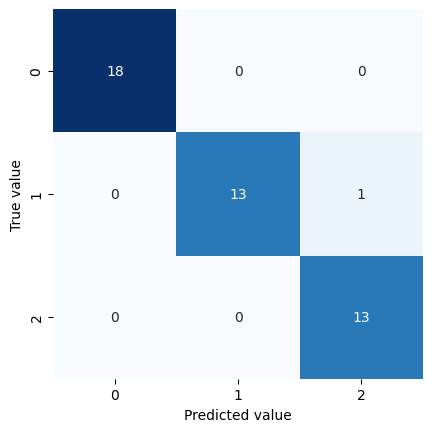

In [44]:
# Define the parameter range.
model = LogisticRegression()
model.fit(Xtrain, ytrain)
y_predicted_test = model.predict(Xtest)
accuracy_score(ytest, y_predicted_test)

# Select the best model.
mat = confusion_matrix(ytest, y_predicted_test)
from seaborn import heatmap
heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('Predicted value')
plt.ylabel('True value');

Compute the predictions on calibration and validation data sets.

In [17]:
# Compute the predictions on calibration and validation data sets.
# Make sure to store them for future reference.

Compute the threshold as the quantile of the calibration scores. Then obtain the prediction sets for the validation data.

In [18]:
# Compute the thresholds.
# Then use the thresholds to obtain the prediction sets for the validation data.

In [19]:
# Print the shape and the first few entries of the prediction sets to check your work.

Evaluate the method on the validation data set by computing:
- average set size (mean
number of labels in the prediction sets)
- coverage (fraction
of test points where the true label is in the prediction set)
- conditional coverage (coverage rates
for each true class): Is the coverage at least 90% for each type of wine?

In [20]:
# Average set size

# Coverage: is y_val[i] contained in confidencesets_classification[i]?

# Conditional coverage


### k-Nearest Neighbours

Repeat the conformal inference procedure from the previous problem, but replace the
penalized logistic regression with **k-nearest neighbors classification**. Use cross-validation on the training set to select the optimal number of neighbors $k$. Use the same conformity score definition as in the previous problem. Compare the coverage and efficiency (average prediction set size) with the logistic regression results, and discuss any differences in performance between the two methods.

In [49]:
# Define the parameter range.
# Run a grid search with cross-validation.
# Select the best model.
# Perform a grid search with cross-validation to select the optimal number of neighbours.
# Import all necessary libraries here.
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler # For normalizing regressors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge, QuantileRegressor

# Import the wine and california_housing data sets from sklearn.datasets.
from sklearn.datasets import load_wine, fetch_california_housing

data2 = load_wine()
X = data2["data"]
X = StandardScaler().fit_transform(X)
y = data2["target"]

# Split into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Split the test set into calibration and validation.
X_cal, X_val, y_cal, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


# kNN

# Perform a grid search with cross-validation to select the optimal number of neighbours.
k_range = np.arange(1, 50)
kNN_cv = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': k_range}, cv=10, scoring="accuracy")
with warnings.catch_warnings(): # Suppress output of warnings
    warnings.simplefilter("ignore")
    kNN_cv.fit(X_train, y_train)
print(kNN_cv.best_params_)
bestkNN = kNN_cv.best_estimator_

y_calproba = bestkNN.predict_proba(X_cal) # proba returns the probability estimates for each class rather than just the predicted class label
y_valproba = bestkNN.predict_proba(X_val)

{'n_neighbors': np.int64(15)}


Compute the predictions on calibration and validation data sets.

In [22]:
# Compute the predictions on calibration and validation data sets.
# Make sure to store them for future reference.

Compute the threshold as the quantile of the calibration scores. Then obtain the prediction sets for the validation data.

In [23]:
# Compute the thresholds.
# Then use the thresholds to obtain the prediction sets for the validation data.

In [24]:
# Print the shape and the first few entries of the prediction sets to check your work.

Evaluate the method on the validation data set by computing:
- average set size (mean
number of labels in the prediction sets)
- coverage (fraction
of test points where the true label is in the prediction set)
- conditional coverage (coverage rates
for each true class): Is the coverage at least 90% for each type of wine?

In [25]:
# Average set size

# Coverage: is y_val[i] contained in confidencesets_classification[i]?

# Conditional coverage

Compare your results to the Logistic Regression model. What do you notice?